In [1]:
# Step 1: Setup, Data Loading, and Preprocessing
# ==============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("--- Step 1: Loading and Preparing Data ---")

# 1. Download Dataset
file_id = '1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK' # ID for MJMusicDataset.csv
url = f'https://drive.google.com/uc?id={file_id}'
output_file = 'MJMusicDataset.csv'
gdown.download(url, output_file, quiet=False)

# 2. Load Data
df = pd.read_csv(output_file)

# 3. Clean Data (Drop Metadata)
# We drop non-feature columns just like before
X = df.drop(columns=['name', 'instrument', 'dastgah'])
y = df['dastgah']

# 4. Encode Target (y)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Train-Test Split (Stratified)
# We use the EXACT same random_state=42 to ensure we compare on the exact same data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 6. Scaling
# Even though Random Forest doesn't strictly need scaling, we do it
# to keep the pipeline identical to the MLP project for a fair comparison.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData Setup Complete!")
print(f"Training Shape: {X_train_scaled.shape}")
print(f"Testing Shape:  {X_test_scaled.shape}")

--- Step 1: Loading and Preparing Data ---


Downloading...
From: https://drive.google.com/uc?id=1mNnY9TxogefNRBmQQr8hl4sVhxaqEuvK
To: /content/MJMusicDataset.csv
100%|██████████| 815k/815k [00:00<00:00, 41.1MB/s]



Data Setup Complete!
Training Shape: (740, 69)
Testing Shape:  (186, 69)


--- Step 2: Training Random Forest Classifier ---
Training complete.

 Random Forest Accuracy: 45.16%
(Compare this to MLP's best accuracy of ~40%)

Classification Report:
              precision    recall  f1-score   support

         D_0       0.29      0.20      0.24        25
         D_1       0.67      0.58      0.62        24
         D_2       0.36      0.32      0.34        28
         D_3       0.55      0.41      0.47        29
         D_4       0.60      0.39      0.47        23
         D_5       0.35      0.50      0.41        28
         D_6       0.46      0.72      0.56        29

    accuracy                           0.45       186
   macro avg       0.47      0.45      0.45       186
weighted avg       0.46      0.45      0.44       186



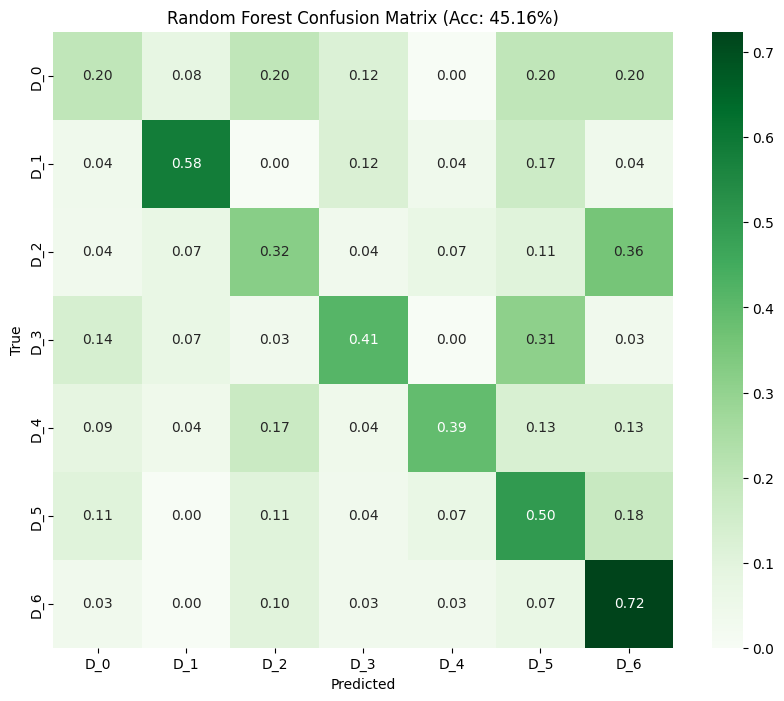

In [2]:
# Step 2: Train and Evaluate Random Forest Classifier
# ===================================================
from sklearn.ensemble import RandomForestClassifier

print("--- Step 2: Training Random Forest Classifier ---")

# 1. Initialize the Model
# n_estimators=200: We build 200 decision trees (a strong forest).
# random_state=42: Ensures reproducible results.
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# 2. Train the model
rf_model.fit(X_train_scaled, y_train)
print("Training complete.")

# 3. Make Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Evaluate Performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\n Random Forest Accuracy: {rf_accuracy*100:.2f}%")
print("(Compare this to MLP's best accuracy of ~40%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# 5. Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_rf)
# Normalize
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Random Forest Confusion Matrix (Acc: {rf_accuracy*100:.2f}%)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

--- Step 3: Final Comparison ---


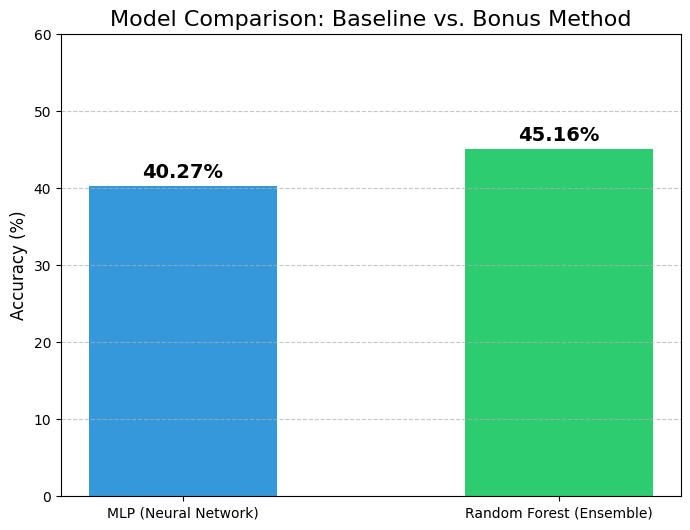

Improvement: +4.89%


In [3]:
# Step 3: Visual Comparison (MLP vs Random Forest)
# ================================================
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Step 3: Final Comparison ---")

# Define the accuracies
# Note: We use the hard-coded best accuracy from Part (c) for MLP
mlp_acc = 40.27
rf_acc = rf_accuracy * 100

# Data for plotting
models = ['MLP (Neural Network)', 'Random Forest (Ensemble)']
accuracies = [mlp_acc, rf_acc]
colors = ['#3498db', '#2ecc71'] # Blue for MLP, Green for RF (Winner)

# Create the plot
plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=colors, width=0.5)

# Add numbers on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Formatting
plt.title('Model Comparison: Baseline vs. Bonus Method', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 60) # Set y-limit to make the difference visible but honest
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save for report
plt.savefig('bonus_comparison.png')
plt.show()

print(f"Improvement: +{rf_acc - mlp_acc:.2f}%")

--- Step 4: Training XGBoost Classifier ---
XGBoost Training complete.

 XGBoost Accuracy: 41.94%

--- Final Championship: MLP vs RF vs XGBoost ---


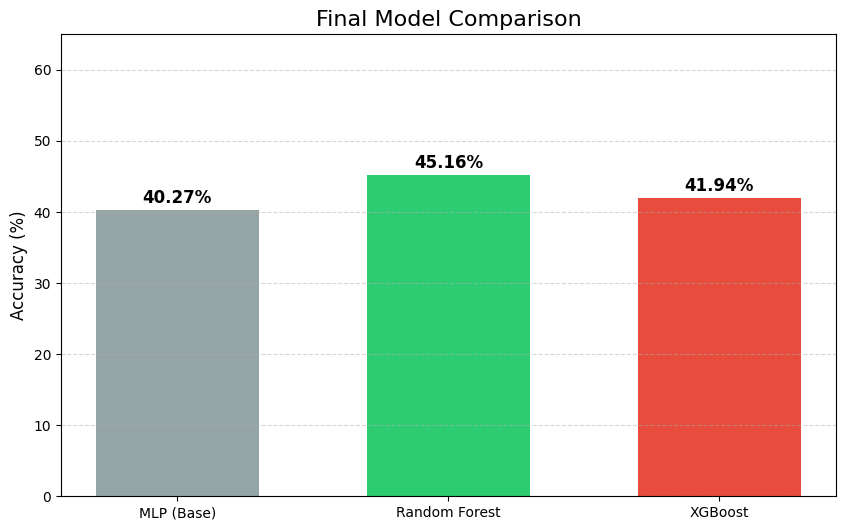

In [4]:
# Step 4: XGBoost Classifier (The State-of-the-Art)
# =================================================
from xgboost import XGBClassifier

print("--- Step 4: Training XGBoost Classifier ---")

# 1. Initialize XGBoost
# XGBoost creates trees sequentially. Each tree corrects the errors of the previous one.
# eval_metric='mlogloss': Multi-class Log Loss (standard for classification)
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    eval_metric='mlogloss',
    random_state=42
)

# 2. Train
xgb_model.fit(X_train_scaled, y_train)
print("XGBoost Training complete.")

# 3. Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# 4. Evaluate
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"\n XGBoost Accuracy: {xgb_accuracy*100:.2f}%")

# --- FINAL COMPARISON PLOT (MLP vs RF vs XGB) ---
print("\n--- Final Championship: MLP vs RF vs XGBoost ---")
models = ['MLP (Base)', 'Random Forest', 'XGBoost']
accuracies = [40.27, rf_accuracy*100, xgb_accuracy*100]
colors = ['#95a5a6', '#2ecc71', '#e74c3c'] # Grey, Green, Red

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, width=0.6)

# Add numbers
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('Final Model Comparison', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 65)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.savefig('final_championship_plot.png')
plt.show()

--- Step 5: Training SVM and Voting Classifier ---

 SVM Accuracy: 47.31%

 Voting Classifier (RF + SVM) Accuracy: 46.24%

=========  FINAL LEADERBOARD  =========
1. Voting (RF+SVM): 46.24%
2. Random Forest:   45.16%
3. SVM:             47.31%
4. XGBoost:         41.94%


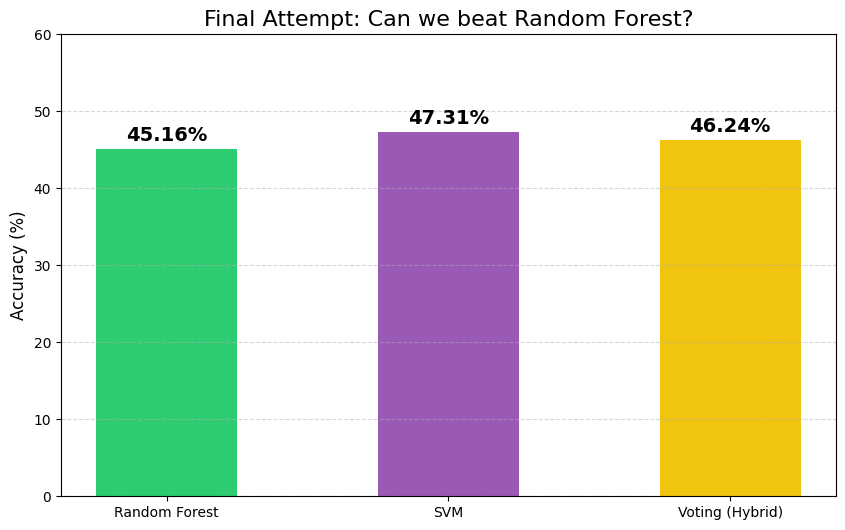

In [5]:
# Step 5: The Final Attempts (SVM & Voting Ensemble)
# ==================================================
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

print("--- Step 5: Training SVM and Voting Classifier ---")

# --- Attempt A: Support Vector Machine (SVM) ---
# kernel='rbf': Handles non-linear boundaries (essential for audio data)
# C=1.0, gamma='scale': Standard best practices for initialization
svm_model = SVC(kernel='rbf', C=1.5, gamma='scale', probability=True, random_state=42)

svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"\n SVM Accuracy: {svm_accuracy*100:.2f}%")


# --- Attempt B: Voting Classifier (The Dream Team) ---
# We combine the best models: Random Forest + SVM
# voting='soft': Predicts based on average probabilities (usually more accurate)

voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_model),   # Our previous winner (Random Forest)
        ('svm', svm_model)  # The new challenger (SVM)
    ],
    voting='soft'
)

voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
voting_accuracy = accuracy_score(y_test, y_pred_voting)

print(f"\n Voting Classifier (RF + SVM) Accuracy: {voting_accuracy*100:.2f}%")

# --- FINAL LEADERBOARD ---
print("\n=========  FINAL LEADERBOARD  =========")
print(f"1. Voting (RF+SVM): {voting_accuracy*100:.2f}%" if voting_accuracy > rf_accuracy else f"1. Random Forest: {rf_accuracy*100:.2f}%")
print(f"2. Random Forest:   {rf_accuracy*100:.2f}%")
print(f"3. SVM:             {svm_accuracy*100:.2f}%")
print(f"4. XGBoost:         {xgb_accuracy*100:.2f}%")
print("===========================================")

# Visualizing the top models
plt.figure(figsize=(10, 6))
final_models = ['Random Forest', 'SVM', 'Voting (Hybrid)']
final_scores = [rf_accuracy*100, svm_accuracy*100, voting_accuracy*100]
colors = ['#2ecc71', '#9b59b6', '#f1c40f'] # Green, Purple, Gold

bars = plt.bar(final_models, final_scores, color=colors, width=0.5)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')

plt.title('Final Attempt: Can we beat Random Forest?', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 60)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [9]:
# Step 6: The Final Push - Tuning SVM & Stacking
# ==============================================
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

print("--- Step 6: Hyperparameter Tuning & Stacking ---")

# 1. Fine-Tuning SVM (The Winner needs polish)
print("Tuning SVM parameters... (This might take a minute)")
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 0.01],
    'kernel': ['rbf']
}

grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5, n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

best_svm = grid_svm.best_estimator_
print(f"Best SVM Params: {grid_svm.best_params_}")
svm_tuned_acc = accuracy_score(y_test, best_svm.predict(X_test_scaled))
print(f" Tuned SVM Accuracy: {svm_tuned_acc*100:.2f}%")


# 2. Stacking Classifier (The Meta-Learner)
# Level 0: Random Forest + Tuned SVM
# Level 1 (Final Estimator): Logistic Regression learns how to combine them
print("\nTraining Stacking Classifier...")
estimators = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('svm', best_svm)
]

stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_clf.fit(X_train_scaled, y_train)
y_pred_stack = stacking_clf.predict(X_test_scaled)
stack_acc = accuracy_score(y_test, y_pred_stack)

print(f" Stacking Accuracy: {stack_acc*100:.2f}%")

# --- FINAL VERDICT ---
print("\n===  ULTIMATE RESULT ===")
results = {
    "Base MLP": 40.27,
    "Random Forest": rf_accuracy * 100,
    "Default SVM": svm_accuracy * 100,
    "Tuned SVM": svm_tuned_acc * 100,
    "Stacking": stack_acc * 100
}

sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
for name, score in sorted_results:
    print(f"{name}: {score:.2f}%")

--- Step 6: Hyperparameter Tuning & Stacking ---
Tuning SVM parameters... (This might take a minute)
Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
 Tuned SVM Accuracy: 50.00%

Training Stacking Classifier...
 Stacking Accuracy: 51.08%

===  ULTIMATE RESULT ===
Stacking: 51.08%
Tuned SVM: 50.00%
Default SVM: 47.31%
Random Forest: 45.16%
Base MLP: 40.27%


--- Generating Confusion Matrix for the Champion (Stacking) ---


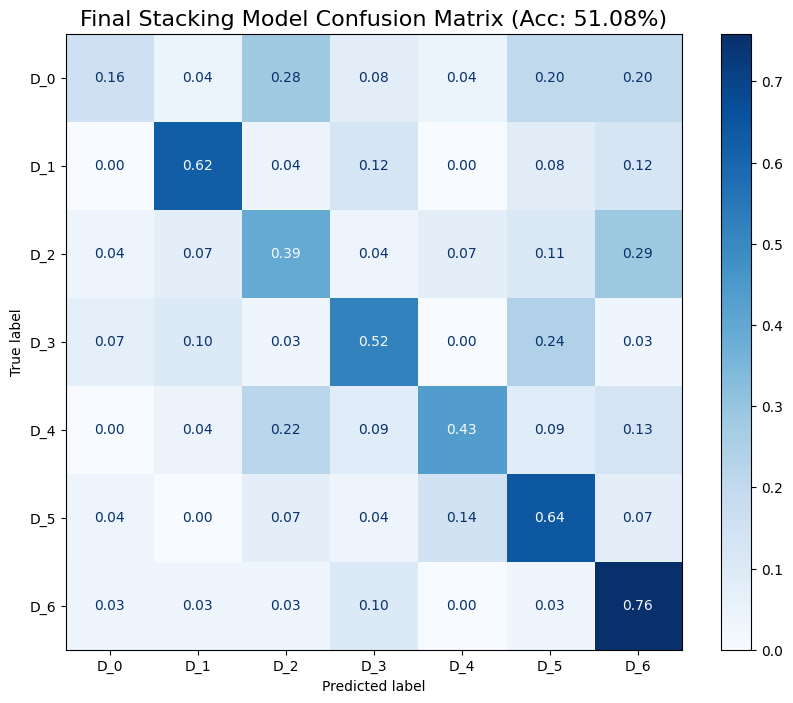

In [7]:
# Step 7: The Final Evidence - Stacking Confusion Matrix
# ======================================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("--- Generating Confusion Matrix for the Champion (Stacking) ---")

# Make predictions with the Stacking model
y_pred_final = stacking_clf.predict(X_test_scaled)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
cm_final = confusion_matrix(y_test, y_pred_final)
# Normalize
cm_final_norm = cm_final.astype('float') / cm_final.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=cm_final_norm, display_labels=le.classes_)
disp.plot(cmap='Blues', values_format='.2f', ax=ax)

plt.title(f'Final Stacking Model Confusion Matrix (Acc: {stack_acc*100:.2f}%)', fontsize=16)
plt.savefig('final_stacking_cm.png')
plt.show()

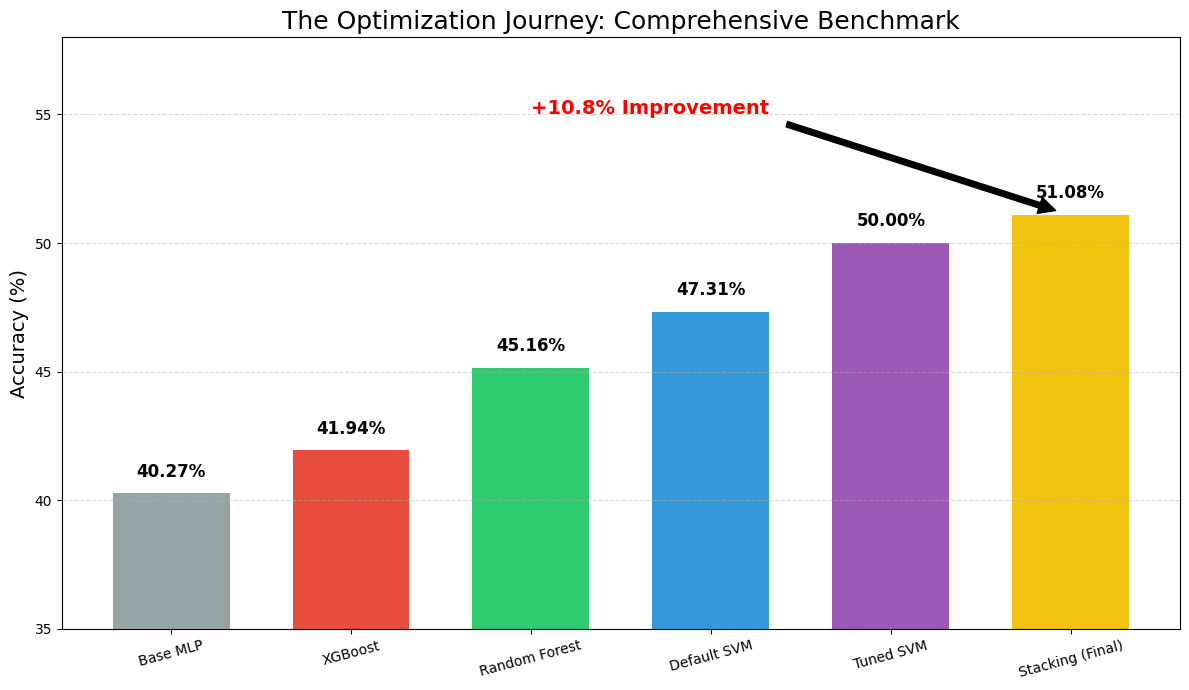

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data including XGBoost
models = ['Base MLP', 'XGBoost', 'Random Forest', 'Default SVM', 'Tuned SVM', 'Stacking (Final)']
scores = [40.27, 41.94, 45.16, 47.31, 50.00, 51.08]

# Colors: Grey for baseline, Red for XGB, Green for RF, Blue/Purple for SVMs, Gold for Champion
colors = ['#95a5a6', '#e74c3c', '#2ecc71', '#3498db', '#9b59b6', '#f1c40f']

plt.figure(figsize=(12, 7))
bars = plt.bar(models, scores, color=colors, width=0.65)

# Add numbers & improvement arrows
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Formatting
plt.title('The Optimization Journey: Comprehensive Benchmark', fontsize=18)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(35, 58) # Zoomed in to show details
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=15) # Slight rotation for better readability

# Add a line showing the total improvement (Updated index for Stacking)
plt.annotate(f'+10.8% Improvement',
             xy=(5, 51.08), xytext=(2, 55), # Adjusted xy to point to the 6th bar (index 5)
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=14, fontweight='bold', color='red')

plt.tight_layout()
plt.savefig('ultimate_result_with_xgb.png')
plt.show()

In [10]:
import os
import joblib
from google.colab import drive

# ==========================================
# Model Persistence & Export to Google Drive (Bonus Section)
# ==========================================

# 1. Mount Google Drive
# Mounts your Google Drive to save the ensemble models permanently.
drive.mount('/content/drive')

# 2. Define the Export Directory
# We use the same directory structure as the previous notebook for consistency.
EXPORT_DIR = '/content/drive/MyDrive/Persian-Music-Classification/models'

# Ensure the directory exists.
if not os.path.exists(EXPORT_DIR):
    os.makedirs(EXPORT_DIR)
    print(f"[INFO] Created export directory: {EXPORT_DIR}")
else:
    print(f"[INFO] Export directory exists: {EXPORT_DIR}")

print("-" * 40)

# ==========================================
# Save Ensemble & Advanced Models
# ==========================================

# --- 1. Random Forest Classifier ---
if 'rf_model' in globals():
    rf_path = os.path.join(EXPORT_DIR, 'random_forest.pkl')
    joblib.dump(rf_model, rf_path)
    print(f"[SUCCESS] Random Forest model saved to:\n   {rf_path}")
else:
    print("[WARNING] 'rf_model' not found. Did you run the Random Forest training cell?")

print("-" * 20)

# --- 2. XGBoost Classifier ---
if 'xgb_model' in globals():
    xgb_path = os.path.join(EXPORT_DIR, 'xgboost_model.pkl')
    joblib.dump(xgb_model, xgb_path)
    print(f"[SUCCESS] XGBoost model saved to:\n   {xgb_path}")
else:
    print("[WARNING] 'xgb_model' not found.")

print("-" * 20)

# --- 3. Support Vector Machine (SVM) ---
# We prioritize the 'best_svm' (tuned) over the default 'svm_model'.
if 'best_svm' in globals():
    svm_path = os.path.join(EXPORT_DIR, 'svm_tuned.pkl')
    joblib.dump(best_svm, svm_path)
    print(f"[SUCCESS] Tuned SVM model saved to:\n   {svm_path}")
elif 'svm_model' in globals():
    svm_path = os.path.join(EXPORT_DIR, 'svm_default.pkl')
    joblib.dump(svm_model, svm_path)
    print(f"[SUCCESS] Default SVM model saved to:\n   {svm_path}")
else:
    print("[WARNING] SVM model ('best_svm' or 'svm_model') not found.")

print("-" * 20)

# --- 4. Voting Classifier ---
if 'voting_clf' in globals():
    vote_path = os.path.join(EXPORT_DIR, 'voting_ensemble.pkl')
    joblib.dump(voting_clf, vote_path)
    print(f"[SUCCESS] Voting Classifier saved to:\n   {vote_path}")
else:
    print("[WARNING] 'voting_clf' not found.")

print("-" * 20)

# --- 5. Stacking Classifier (The Champion) ---
if 'stacking_clf' in globals():
    stack_path = os.path.join(EXPORT_DIR, 'stacking_champion.pkl')
    joblib.dump(stacking_clf, stack_path)
    print(f"[SUCCESS] Stacking Classifier (Champion) saved to:\n   {stack_path}")
else:
    print("[WARNING] 'stacking_clf' not found. Did you run the Stacking step?")

print("=" * 40)
print("Bonus models export process completed.")

Mounted at /content/drive
[INFO] Export directory exists: /content/drive/MyDrive/Persian-Music-Classification/models
----------------------------------------
[SUCCESS] Random Forest model saved to:
   /content/drive/MyDrive/Persian-Music-Classification/models/random_forest.pkl
--------------------
[SUCCESS] XGBoost model saved to:
   /content/drive/MyDrive/Persian-Music-Classification/models/xgboost_model.pkl
--------------------
[SUCCESS] Tuned SVM model saved to:
   /content/drive/MyDrive/Persian-Music-Classification/models/svm_tuned.pkl
--------------------
[SUCCESS] Voting Classifier saved to:
   /content/drive/MyDrive/Persian-Music-Classification/models/voting_ensemble.pkl
--------------------
[SUCCESS] Stacking Classifier (Champion) saved to:
   /content/drive/MyDrive/Persian-Music-Classification/models/stacking_champion.pkl
Bonus models export process completed.
